<h1><b>인공지능 개론 1주차 과제</b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<br>
<p><b>다음 데이터 셋에 대하여 DT, RF, SVM, LR 분류를 각각 수행해보세요.</b></p>


데이터셋:
/content/iris.csv


---



**<h2>각 알고리즘에 대한 간단한 설명</h2>**

---

## **1. DT (Decision Tree, 결정 트리)**
**✔ 개념:**  
   - 데이터 속성을 기준으로 분할하여 나무 형태의 구조를 만드는 알고리즘  
   - **"Yes/No" 형태의 질문을 반복**하여 최종 클래스를 결정  

**✔ 특징:**  
   - 직관적이고 해석이 쉬움  
   - 과적합(overfitting) 가능성이 큼 (특히 깊은 트리)  
   - 연속형 및 범주형 데이터 모두 사용 가능  

**✔ 단점:**  
   - 데이터가 복잡하면 트리가 너무 깊어질 수 있음 (복잡한 모델 -> 일반화 어려움)  
   - 작은 변화에도 구조가 크게 바뀔 수 있음  

---

## **2. RF (Random Forest, 랜덤 포레스트)**
**✔ 개념:**  
   - 여러 개의 **결정 트리(Decision Tree)를 조합**한 앙상블 학습 방법  
   - 각각의 트리에서 나온 예측을 **투표(Voting) 또는 평균(Averaging)** 으로 최종 결정  

**✔ 특징:**  
   - 과적합 방지가 잘됨 (여러 트리를 결합하므로)  
   - 노이즈와 이상치에 강함  
   - 훈련 속도는 상대적으로 느릴 수 있음  

**✔ 단점:**  
   - 개별 결정 트리에 비해 모델이 복잡하고 해석이 어려움  
   - 메모리 사용량이 큼  

---

## **3. SVM (Support Vector Machine, 서포트 벡터 머신)**
**✔ 개념:**  
   - 데이터 포인트를 분류하는 **결정 경계(Decision Boundary)** 를 찾아주는 알고리즘  
   - 최대한 margin(여백)을 크게 하는 **초평면(Hyperplane)** 을 학습  

**✔ 특징:**  
   - 고차원 데이터에도 강력한 성능을 보임  
   - 커널 트릭(Kernel Trick)을 사용해 비선형 데이터도 잘 분류 가능  
   - 작은 데이터셋에서도 뛰어난 성능을 보임  

**✔ 단점:**  
   - 데이터가 많아지면 학습 속도가 느려질 수 있음  
   - 최적의 하이퍼파라미터(C, 커널 종류 등)를 찾기 어려움  
   - 해석이 어려움  

---

## **4. LR (Logistic Regression, 로지스틱 회귀)**
**✔ 개념:**  
   - 선형 회귀를 기반으로 하여, **결과값을 0과 1 사이의 확률로 변환하는 알고리즘**  
   - 출력값이 특정 클래스로 분류될 확률을 예측  

**✔ 특징:**  
   - 모델이 단순하고 빠르게 학습 가능  
   - 해석이 용이하여 통계 분석에서도 많이 사용됨  
   - 선형적으로 분리 가능한 문제에서 좋은 성능을 보임  

**✔ 단점:**  
   - 선형적으로 분리되지 않는 데이터에서는 성능이 떨어짐  
   - 다중 클래스 분류에서는 One-vs-Rest(OvR) 또는 Softmax를 사용해야 함  

---

### **📌 정리**
| 알고리즘 | 장점 | 단점 |  
|----------|----------------|----------------|  
| **DT** (결정 트리) | 직관적, 해석 쉬움 | 과적합 가능성 높음 |  
| **RF** (랜덤 포레스트) | 과적합 방지, 노이즈에 강함 | 메모리 사용량 많음, 속도 느릴 수 있음 |  
| **SVM** (서포트 벡터 머신) | 고차원 데이터에 강함, 강력한 성능 | 속도가 느림, 해석 어려움 |  
| **LR** (로지스틱 회귀) | 단순하고 빠름, 확률 예측 가능 | 비선형 데이터에 약함 |  


**<h2>실제로 분류해보기</h2>**


---



In [8]:
#pandas를 사용해 파일을 불러와 읽기
import pandas as pd
iris = pd.read_csv('/content/iris.csv')

#제대로 읽어들였는지 head()메서드로 처음 5개의 샘플을 확인
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#info()메서드를 통해 각 열의 데이터 타입과 누락된 데이터가 있는지 확인
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#describe메서드를 통해 간략한 통계 출력
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>해당 데이터셋에는 iris-setosa, iris-versicolor, iris-virginica 세 종류의
붓꽃이 존재하고, 각각의 데이터는 서로 다른 SepalLength, SepalWidth, PetalLength, PetalWidth값을 가지고 있음.<br>

In [11]:
#pandas데이터프레임을 넘파이 배열로 변환 (이유??)
data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']].to_numpy()
target = iris['Name'].to_numpy()
#이렇게하면 처음 4개의 열이 data배열에 저장되고 마지막 Name열이 target배열에 저장됨

#훈련세트와 데이터세트로 나누기(20% 테스트세트지정-test_size=0.2)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
#훈련세트 120개, 테스트세트 30개
print(train_input.shape, test_input.shape)

(120, 4) (30, 4)


In [15]:
#StandardScale클래스를 사용해 훈련세트를 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
############################################

<h2><b>LR(로지스틱 회귀) 분류<b></h2>

---



In [16]:
#위의 결과로 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9666666666666667
1.0


In [14]:
#로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[-1.00552522  1.14073011 -1.81144961 -1.70457567]
 [ 0.53001313 -0.28311266 -0.34401919 -0.71146263]
 [ 0.47551209 -0.85761746  2.15546881  2.4160383 ]] [-0.14078995  1.98420804 -1.84341809]


<h3><b>LR(로지스틱 회귀) 분류 결과</b></h3>

---


<li>훈련세트 점수: 0.9666666666666667</li>
<li>테스트세트 점수: 1.0</li>
<li>학습계수: <br>
 [-1.00552522  1.14073011 -1.81144961 -1.70457567]<br>
 [ 0.53001313 -0.28311266 -0.34401919 -0.71146263]<br>
 [ 0.47551209 -0.85761746  2.15546881  2.4160383 ]
<li>절편: [-0.14078995  1.98420804 -1.84341809]<br><br>

<b>결론: 훈련세트와 테스트 점수가 높고 과대적합이나 과소적합으로 치우치지 않음</b>

<h2><b>DT(결정 트리) 분류<b></h2>

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) #훈련 세트
print(dt.score(test_scaled, test_target))   #테스트 세트

1.0
1.0


<h3><b>DT(결정 트리) 분류 결과</b></h3>


---


<b>훈련세트와 테스트세트점수가 모두 1.0으로 매우 높은 편.</b>

<h3><b>DT(결정 트리) 시각화</b></h3>

---
max_depth는 3으로 지정한다.

In [20]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9583333333333334
1.0


**훈련세트의 성능은 낮아졌지만 테스트세트의 성능은 그대로인걸 확인할 수 있다.**

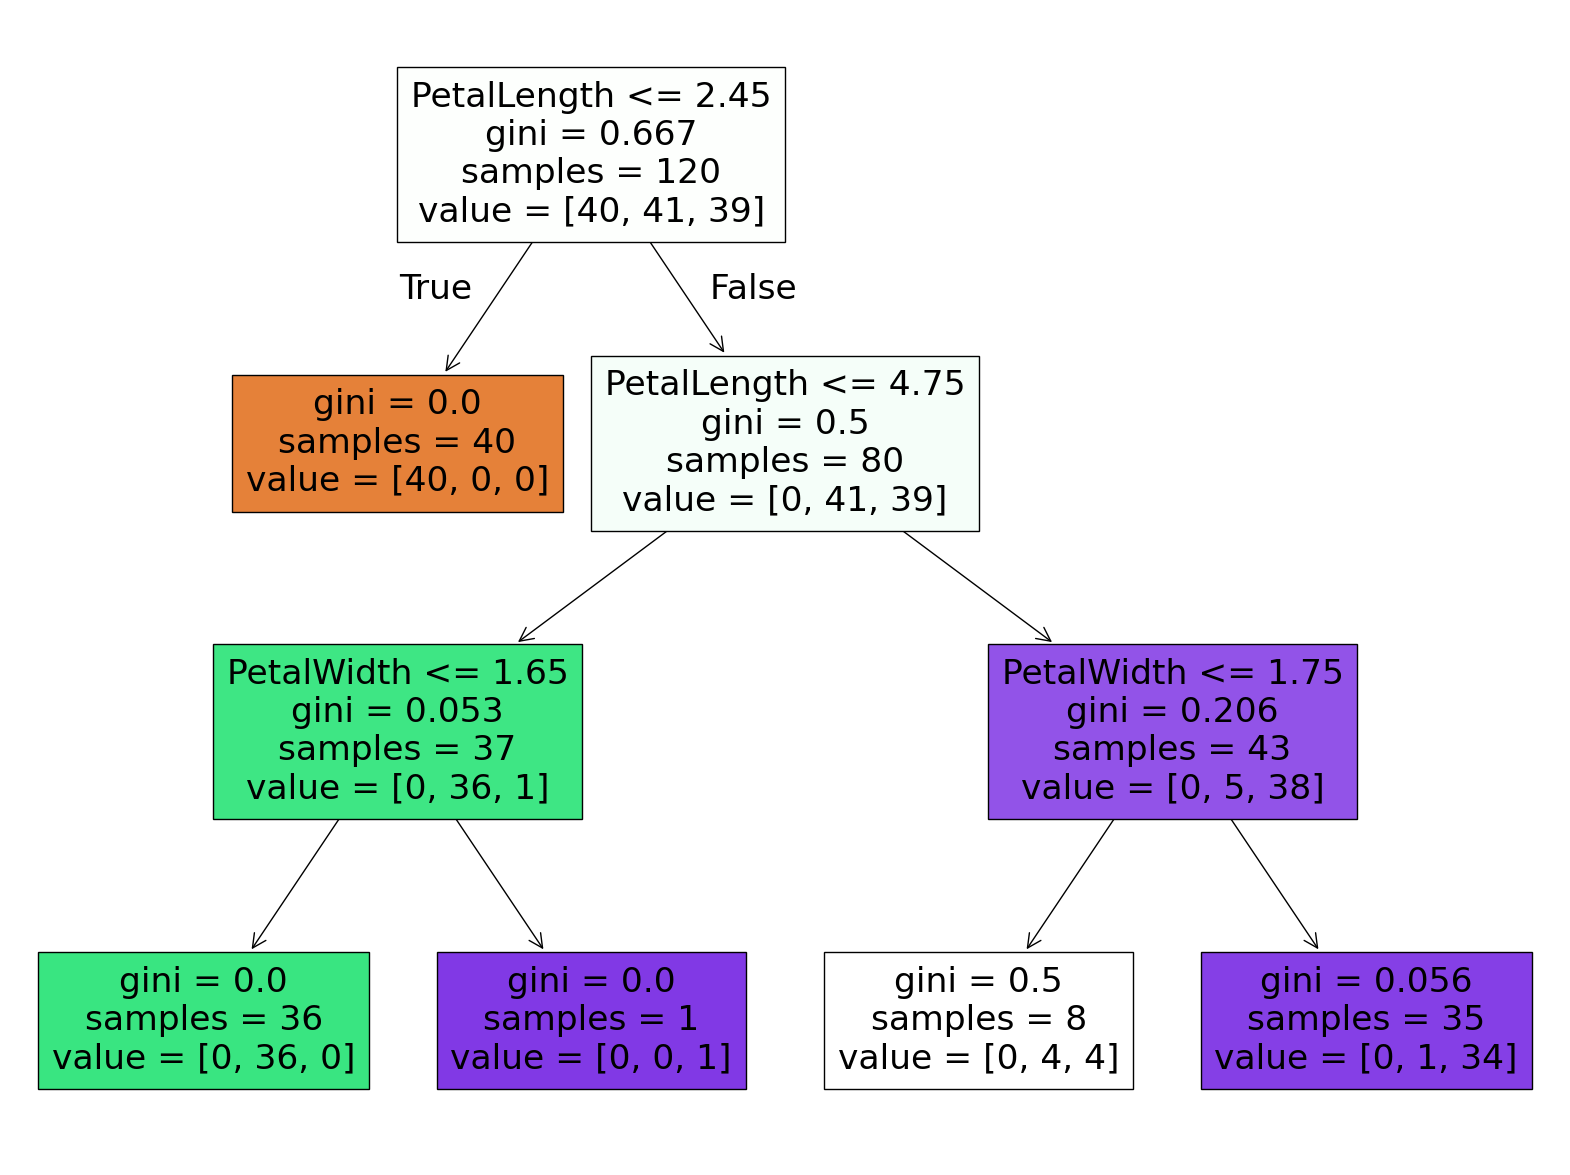

In [21]:
#plot_tree함수를 이용해 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
plt.show()

<h2><b>RF(랜덤 포레스트) 분류 & 결과<b></h2>

---



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# RandomForestClassifier 모델 생성
rf = RandomForestClassifier(random_state=42)

# 훈련 데이터로 모델 학습
rf.fit(train_scaled, train_target)

# 테스트 데이터로 예측
test_pred = rf.predict(test_scaled)

# 정확도 출력
accuracy = accuracy_score(test_target, test_pred)
print(f"정확도: {accuracy:.4f}")

# 분류 보고서 출력
print("결과 보고서:")
print(classification_report(test_target, test_pred))

정확도: 1.0000
결과 보고서:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<h2><b>SVM(서포트 벡터 머신) 분류 & 결과<b></h2>

---



In [24]:
from sklearn.svm import SVC

# SVM 모델 생성 (커널은 'linear'로 설정)
svm = SVC(kernel='linear', random_state=42)

# 훈련 데이터로 모델 학습
svm.fit(train_scaled, train_target)

# 테스트 데이터로 예측
test_pred = svm.predict(test_scaled)

# 정확도 출력
accuracy = accuracy_score(test_target, test_pred)
print(f"정확도: {accuracy:.4f}")

# 분류 보고서 출력
print("결과 보고서:")
print(classification_report(test_target, test_pred))

정확도: 0.9667
결과 보고서:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

